In [3]:
# imports
import pandas as pd
import osmnx as ox
import numpy as np
from networkx import NetworkXNoPath
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt

# no max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

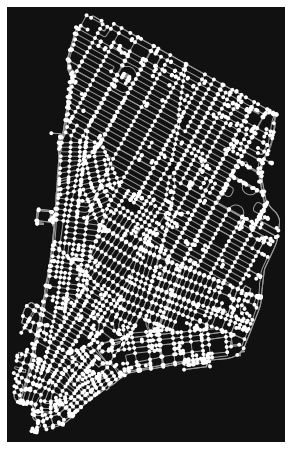

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
# load graph of Manhattan below 34th with nodes
G = ox.io.load_graphml('../../data/mnh_below_34th.graphml')

# plot graph
ox.plot_graph(G)

In [5]:
# load census tracts map
tract_gdf = gpd.read_file('../../data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')

In [6]:
# check shape
tract_gdf.shape

(2165, 12)

In [7]:
# check head
tract_gdf.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          E  000900       9    SI22   
1         1    1009800      Manhattan          I  009800      98    MN19   
2         1    1010200      Manhattan          I  010200     102    MN17   
3         1    1010400      Manhattan          I  010400     104    MN17   
4         1    1011300      Manhattan          I  011300     113    MN17   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.200306   
2                      Midtown-Midtown South  3807  1.860993e+06  5687.802439   
3                      Midtown-Midtown South  3807  1.864600e+06  5693.036367   
4                      Midtown-Midtown South  3807  1.890907e+06  5699.860712   

                                            geometry  
0  POLYGON ((-74.07921 40.64343, -74.07914 40.643...  
1  POLYGON ((-73.96433 40.75638, -73.96479 40.755...  
2  POLYGON ((-73.97124 40.76094, -73.97170 40.760...  
3  POLYGON ((-73.97446 40.76229, -73.97491 40.761...  
4  POLYGON ((-73.98412 40.75484, -73.98460 40.754...

In [8]:
# create only Manhattan tracts df
ny_county_tracts_gdf = tract_gdf.loc[tract_gdf['boro_name']=='Manhattan'].copy()

# check shape
ny_county_tracts_gdf.shape

(288, 12)

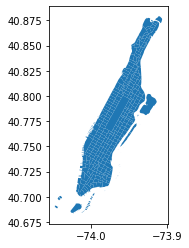

In [9]:
#plot tracts
ax = ny_county_tracts_gdf.plot()

In [10]:
# check crs
ny_county_tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# create geopandas df from graph
node_gdf = ox.utils_graph.graph_to_gdfs(G,nodes=True,edges=False,node_geometry=True)

# examine node df head
node_gdf.head()

y          x  street_count          highway  ref  \
osmid                                                                
42421828  40.725326 -73.976212             3              NaN  NaN   
42421837  40.726545 -73.975314             3              NaN  NaN   
42421877  40.732857 -73.995929             4  traffic_signals  NaN   
42421889  40.734146 -73.999182             4  traffic_signals  NaN   
42421927  40.726263 -73.994403             4              NaN  NaN   

                            geometry  
osmid                                 
42421828  POINT (-73.97621 40.72533)  
42421837  POINT (-73.97531 40.72654)  
42421877  POINT (-73.99593 40.73286)  
42421889  POINT (-73.99918 40.73415)  
42421927  POINT (-73.99440 40.72626)

In [17]:
# check node df crs
node_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# shape join node points intersecting census tract polygons
nodes_in_tracts = gpd.sjoin(node_gdf,ny_county_tracts_gdf, predicate='intersects')

# examine head
nodes_in_tracts.head()

y          x  street_count          highway  ref  \
osmid                                                                
42421828  40.725326 -73.976212             3              NaN  NaN   
42421837  40.726545 -73.975314             3              NaN  NaN   
42430924  40.726866 -73.979906             4  traffic_signals  NaN   
42430938  40.725883 -73.977536             4  traffic_signals  NaN   
42436957  40.727755 -73.976180             4  traffic_signals  NaN   

                            geometry  index_right boro_code boro_ct201  \
osmid                                                                    
42421828  POINT (-73.97621 40.72533)         1402         1    1002800   
42421837  POINT (-73.97531 40.72654)         1402         1    1002800   
42430924  POINT (-73.97991 40.72687)         1402         1    1002800   
42430938  POINT (-73.97754 40.72588)         1402         1    1002800   
42436957  POINT (-73.97618 40.72775)         1402         1    1002800   

          boro_name cdeligibil  ct2010 ctlabel ntacode          ntaname  puma  \
osmid                                                                           
42421828  Manhattan          E  002800      28    MN28  Lower East Side  3809   
42421837  Manhattan          E  002800      28    MN28  Lower East Side  3809   
42430924  Manhattan          E  002800      28    MN28  Lower East Side  3809   
42430938  Manhattan          E  002800      28    MN28  Lower East Side  3809   
42436957  Manhattan          E  002800      28    MN28  Lower East Side  3809   

            shape_area   shape_leng  
osmid                                
42421828  1.973678e+06  5627.555017  
42421837  1.973678e+06  5627.555017  
42430924  1.973678e+06  5627.555017  
42430938  1.973678e+06  5627.555017  
42436957  1.973678e+06  5627.555017

In [28]:
# check column names
nodes_in_tracts.columns

Index(['y', 'x', 'street_count', 'highway', 'ref', 'geometry', 'index_right',
       'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng'],
      dtype='object')

In [39]:
# load node ID and Census Tract ID into csv
node_id_census_tracts = nodes_in_tracts[['ct2010']].copy()

In [47]:
node_id_census_tracts.head()

ct2010
osmid           
42421828  002800
42421837  002800
42430924  002800
42430938  002800
42436957  002800

In [49]:
# save csv with node ids and census tracts
node_id_census_tracts.to_csv(path_or_buf='../../data/node_id_census_tract_key.csv')